# Employee Exploration

## Setup

In [1]:
# Import Dependencies

#Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import SQLAlchemy Automap, ORM, and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [3]:
# Configure Database from PostgreSQL
from config import uri

In [4]:
# Create Engine
engine = create_engine(uri)

## Reflect and Explore Database

In [5]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['Employees',
 'Department_Employee',
 'Departments',
 'Department_Manager',
 'Salaries',
 'Titles']

In [6]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect = True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['Employees',
 'Department_Employee',
 'Departments',
 'Department_Manager',
 'Salaries',
 'Titles']

In [8]:
# Assign the "Departments" class to a variable called Departments
Departments = Base.classes.Departments

# Assign the "Employees" class to a variable called Employees
Employees = Base.classes.Employees

# Assign the "Salaries" class to a variable called Salaries
Salaries = Base.classes.Salaries

# Assign the "Titles" class to a variable calledTitlesEmployees
Titles = Base.classes.Titles

## Query Database and Convert to Dataframes

In [9]:
# Start a session to query the database
session = Session(bind=engine)

In [10]:
# Query the EmployeeSQL database for Employee Name. Save as a dataframe.
query = session.query(Employees)
employee_df = pd.read_sql_query(query.statement, session.get_bind())
employee_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [11]:
# Query the EmployeeSQL database for Titles. Save as a dataframe.
query_title = session.query(Titles)
titles_df = pd.read_sql_query(query_title.statement, session.get_bind())
titles_df.head()

,id,emp_no,title,from_date,to_date
0,1,10001,Senior Engineer,1986-06-26,9999-01-01
1,2,10002,Staff,1996-08-03,9999-01-01
2,3,10003,Senior Engineer,1995-12-03,9999-01-01
3,4,10004,Engineer,1986-12-01,1995-12-01
4,5,10004,Senior Engineer,1995-12-01,9999-01-01


In [12]:
# Query the EmployeeSQL database for Salaries. Save as a dataframe.
query_salary = session.query(Salaries)
salaries_df = pd.read_sql_query(query_salary.statement, session.get_bind())
salaries_df.head()

,id,emp_no,salary,from_date,to_date
0,1,10001,60117,1986-06-26,1987-06-26
1,2,10002,65828,1996-08-03,1997-08-03
2,3,10003,40006,1995-12-03,1996-12-02
3,4,10004,40054,1986-12-01,1987-12-01
4,5,10005,78228,1989-09-12,1990-09-12


In [13]:
# Join queried databases
emp_title_df = pd.merge(employee_df, titles_df, on="emp_no", how="outer")
emp_sal_title_df = pd.merge(emp_title_df, salaries_df, on="emp_no", how="outer")

# Rename columns
emp_sal_title_df = emp_sal_title_df.rename(columns={
                                                    "emp_no":"Employee No.",
                                                    "birth_date":"Birth Date",
                                                    "first_name":"First Name",
                                                    "last_name":"Last Name",
                                                    "gender":"Gender",
                                                    "hire_date":"Hire Date",
                                                    "title":"Title", 
                                                    "from_date_x":"Title Start Date",
                                                    "to_date_x":"Title End Date",
                                                    "salary":"Salary",
                                                    "from_date_y":"Salary Start Date",
                                                    "to_date_y":"Salary End Date"})

# Drop unnecessary IDs
emp_sal_title_df = emp_sal_title_df.drop(labels=["id_x", "id_y"], axis=1)

emp_sal_title_df.head()

,Employee No.,Birth Date,First Name,Last Name,Gender,Hire Date,Title,Title Start Date,Title End Date,Salary,Salary Start Date,Salary End Date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01


## Matplotlib

#### Plot Average Salary by Title

In [15]:
# Group by title. Find mean salary by title.
title_salary = emp_sal_title_df.groupby("Title").mean()
title_salary

,Employee No.,Salary
Title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


Create a bar chart to show average salary by title

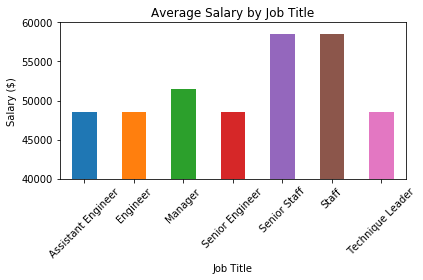

In [28]:
# Set title
title = "Average Salary by Job Title"

# Create chart
salary_chart = title_salary["Salary"].plot(kind="bar", title=title, ylim=[40000, 60000])

# Set labels
salary_chart.set_xlabel("Job Title")
salary_chart.set_ylabel("Salary ($)")

# Set xtick rotations
plt.xticks(rotation=45)

# Set layout
plt.tight_layout()

# Show plot
salary_chart = plt.gcf()
plt.show()


In [30]:
# Save figure
salary_chart.savefig("Images/Average_Salary_by_Title.png")

#### Plot Frequency of Salary Ranges

In [35]:
# Create a new variable to hold merged dataframes
salary_freq_df = emp_sal_title_df

In [36]:
# Find min and max salaries. Save to variable
min_sal = salary_freq_df["Salary"].min()
max_sal = salary_freq_df["Salary"].max()

In [42]:
# Create bins to hold salary data
# Create size bins
size_bins = [40000-1, 50000-1, 60000-1, 70000-1, 80000-1, 90000-1, 100000-1, 110000-1, 120000-1, 130000+1]

# Create labels for bins
group_names = ["$40,000-$49,999", "$50,000-$59,999", "$60,000-$69,999", "$70,000-$79,999",
              "$80,000-$89,999", "$90,000-$99,999", "$100,000-$109,999", 
              "$110,000-$119,999", "$120,000-$130,000"]

In [44]:
# Cut bins
salary_freq_df["Salary Range"] = pd.cut(salary_freq_df["Salary"], size_bins, labels=group_names)

# Show dataframe
salary_freq_df.head()

,Employee No.,Birth Date,First Name,Last Name,Gender,Hire Date,Title,Title Start Date,Title End Date,Salary,Salary Start Date,Salary End Date,Salary Range
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26,"$60,000-$69,999"
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03,"$60,000-$69,999"
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02,"$40,000-$49,999"
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01,"$40,000-$49,999"
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01,"$40,000-$49,999"


In [53]:
# Create group based on bins
salary_group_df = salary_freq_df.groupby("Salary Range")

# Show only Salary Range
salary_group_df = salary_group_df["Salary", "Salary Range"]
salary_group_df.count()

,Salary,Salary Range
Salary Range,,
"$40,000-$49,999",233486,233486
"$50,000-$59,999",85655,85655
"$60,000-$69,999",61247,61247
"$70,000-$79,999",36860,36860
"$80,000-$89,999",17680,17680
"$90,000-$99,999",6456,6456
"$100,000-$109,999",1598,1598
"$110,000-$119,999",289,289
"$120,000-$130,000",37,37
